Keras API-based Approach:


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images and normalize pixel values
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Define the model function with increased dropout and L2 regularization
def create_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,), kernel_regularizer='l2'),
        Dropout(0.5),  # Increased dropout rate
        Dense(256, activation='relu', kernel_regularizer='l2'),
        Dropout(0.5),  # Increased dropout rate
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = create_model()
sgd = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
1500/1500 [==============================] - 14s 9ms/step - loss: 2.4055 - accuracy: 0.8463 - val_loss: 0.5804 - val_accuracy: 0.9302
Epoch 2/50
1500/1500 [==============================] - 14s 10ms/step - loss: 0.6605 - accuracy: 0.8978 - val_loss: 0.5524 - val_accuracy: 0.9308
Epoch 3/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6441 - accuracy: 0.9019 - val_loss: 0.5391 - val_accuracy: 0.9352
Epoch 4/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6475 - accuracy: 0.9027 - val_loss: 0.5611 - val_accuracy: 0.9339
Epoch 5/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.6574 - accuracy: 0.9011 - val_loss: 0.5532 - val_accuracy: 0.9443
Epoch 6/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6699 - accuracy: 0.8997 - val_loss: 0.5842 - val_accuracy: 0.9306
Epoch 7/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.6736 - accuracy: 0.9001 - val_loss: 0.5941 - val_

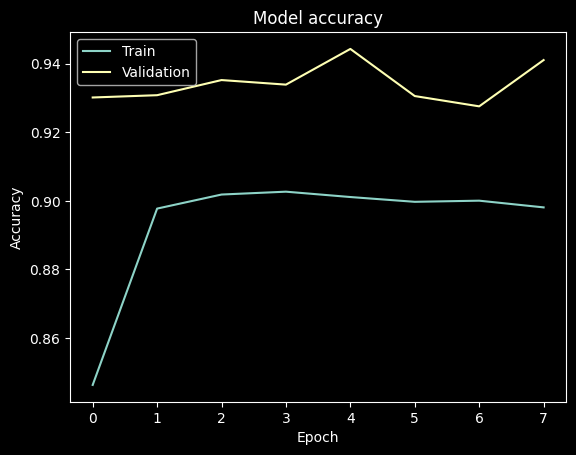

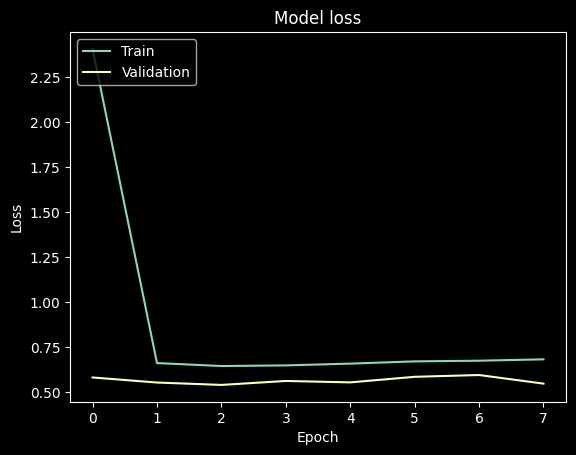

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


From Scratch Implementation

In [ ]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images and normalize pixel values
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train_onehot = np.eye(num_classes)[y_train]
y_test_onehot = np.eye(num_classes)[y_test]

# Split train set into train and validation sets
X_train, X_val, y_train_onehot, y_val_onehot = train_test_split(X_train, y_train_onehot, test_size=0.1, random_state=42)

# Define ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define softmax activation function
def softmax(x):
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Define dropout function
def dropout(x, dropout_prob):
    mask = np.random.rand(*x.shape) < dropout_prob
    return x * mask / dropout_prob, mask

# Define cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[np.arange(m), np.argmax(y_true, axis=1)])
    return np.sum(log_likelihood) / m

# Define the neural network architecture
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob):
        self.W1 = np.random.randn(input_size, hidden_size1) * 0.01
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, output_size) * 0.01
        self.b3 = np.zeros((1, output_size))
        self.dropout_prob = dropout_prob
        self.dropout_mask1 = None
        self.dropout_mask2 = None

    def forward(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = relu(z1)
        a1, self.dropout_mask1 = dropout(a1, self.dropout_prob)

        z2 = np.dot(a1, self.W2) + self.b2
        a2 = relu(z2)
        a2, self.dropout_mask2 = dropout(a2, self.dropout_prob)

        z3 = np.dot(a2, self.W3) + self.b3
        return softmax(z3)

    def backward(self, X, y_true, learning_rate):
        m = X.shape[0]
        grad_softmax = self.forward(X)
        grad_softmax[np.arange(m), np.argmax(y_true, axis=1)] -= 1
        grad_softmax /= m

        grad_W3 = np.dot(grad_softmax.T, relu(np.dot(relu(np.dot(X, self.W1) + self.b1), self.W2) + self.b2)).T
        grad_b3 = np.sum(grad_softmax, axis=0, keepdims=True)

        grad_relu2 = np.dot(grad_softmax, self.W3.T)
        grad_relu2 = grad_relu2 * (relu(np.dot(relu(np.dot(X, self.W1) + self.b1), self.W2) + self.b2) > 0)
        grad_relu2 = grad_relu2 * self.dropout_mask2
        grad_W2 = np.dot(grad_relu2.T, relu(np.dot(X, self.W1) + self.b1)).T
        grad_b2 = np.sum(grad_relu2, axis=0, keepdims=True)

        grad_relu1 = np.dot(grad_relu2, self.W2.T)
        grad_relu1 = grad_relu1 * (relu(np.dot(X, self.W1) + self.b1) > 0)
        grad_relu1 = grad_relu1 * self.dropout_mask1
        grad_W1 = np.dot(grad_relu1.T, X).T
        grad_b1 = np.sum(grad_relu1, axis=0, keepdims=True)

        # Update parameters
        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2
        self.W3 -= learning_rate * grad_W3
        self.b3 -= learning_rate * grad_b3

# Define hyperparameters
input_size = X_train.shape[1]
hidden_size1 = 128
hidden_size2 = 64
output_size = num_classes
dropout_prob = 0.5
learning_rate = 0.01
num_epochs = 10
batch_size = 32

# Initialize the neural network
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size, dropout_prob)

# Training loop
for epoch in range(num_epochs):
    # Shuffle training data
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train_onehot[permutation]

    # Mini-batch training
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]

        # Forward pass
        y_pred = model.forward(X_batch)

        # Backward pass
        model.backward(X_batch, y_batch, learning_rate)

    # Evaluate on validation set
    y_val_pred = model.forward(X_val)
    val_loss = cross_entropy_loss(y_val_onehot, y_val_pred)
    val_acc = np.mean(np.argmax(y_val_onehot, axis=1) == np.argmax(y_val_pred, axis=1))
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

# Evaluate on test set
y_test_pred = model.forward(X_test)
test_loss = cross_entropy_loss(y_test_onehot, y_test_pred)
test_acc = np.mean(np.argmax(y_test_onehot, axis=1) == np.argmax(y_test_pred, axis=1))
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


# Forward pass for test data
dlayer1.forward(X_test)
alayer1.forward(dlayer1.output)
dlayer2.forward(alayer1.output)
softmax.forward(dlayer2.output)

# Predictions
ypred = np.argmax(softmax.output.T, axis=1)
print("Predictions:", ypred)

# True labels
ytrue = np.argmax(Y_test.T, axis=1)
print("True labels:", ytrue)

# Calculate accuracy
accuracy = np.mean(ytrue == ypred)
print("Accuracy:", accuracy)



Epoch 1/10, Validation Loss: 2.301371793577604, Validation Accuracy: 0.109
Epoch 2/10, Validation Loss: 2.299867556652398, Validation Accuracy: 0.109
Epoch 3/10, Validation Loss: 2.2891603271320977, Validation Accuracy: 0.1175
Epoch 4/10, Validation Loss: 1.938604120501656, Validation Accuracy: 0.3441666666666667
Epoch 5/10, Validation Loss: 1.2164489727315668, Validation Accuracy: 0.5665
Epoch 6/10, Validation Loss: 0.9556722800138996, Validation Accuracy: 0.675
Epoch 7/10, Validation Loss: 0.7872218160092516, Validation Accuracy: 0.7428333333333333
Epoch 8/10, Validation Loss: 0.6711936967139536, Validation Accuracy: 0.79
Epoch 9/10, Validation Loss: 0.6063934157989906, Validation Accuracy: 0.811
Epoch 10/10, Validation Loss: 0.559860316922751, Validation Accuracy: 0.829
Test Loss: 0.5471342854952994, Test Accuracy: 0.8324


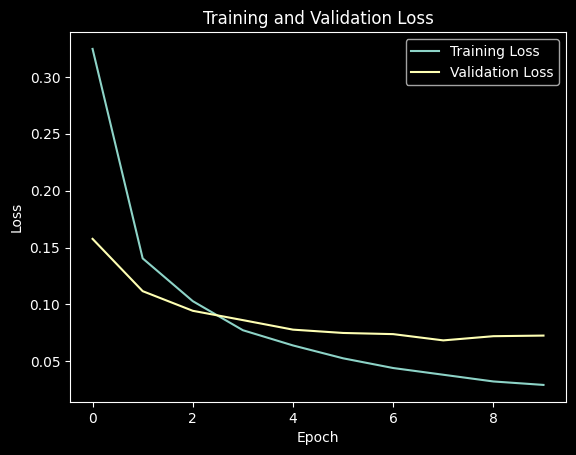

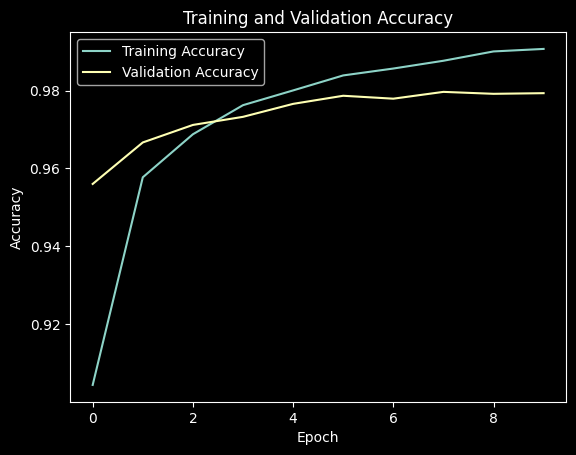

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
